In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/macbookpro/Desktop/ML/Course Material/DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [34]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

/Users/macbookpro/envs/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

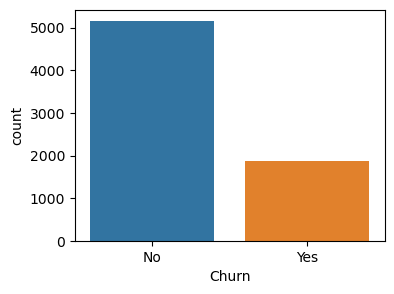

In [40]:
plt.figure(figsize=(4,3))
sns.countplot(df['Churn'])

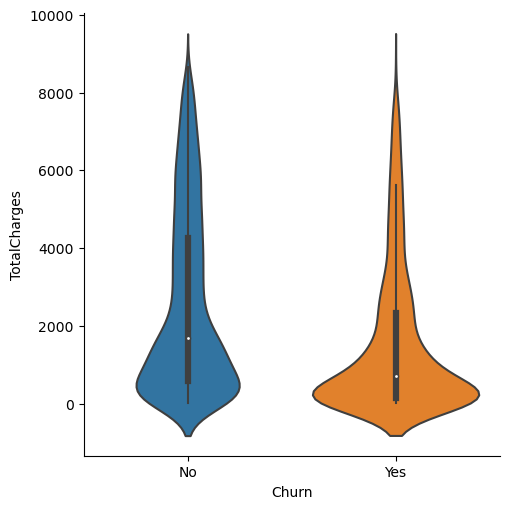

In [7]:
sns.catplot(x='Churn', y='TotalCharges', data=df, kind='violin')

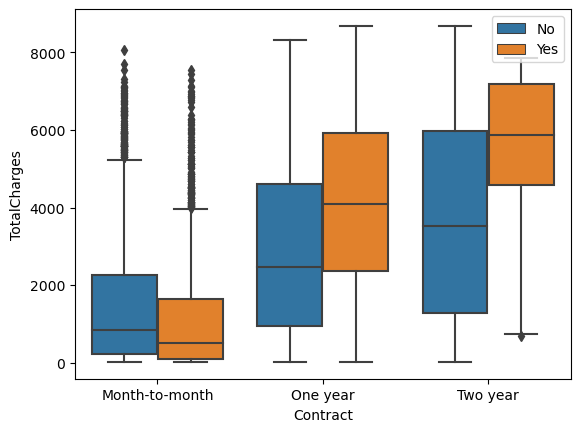

In [10]:
sns.boxplot(x='Contract', y='TotalCharges', hue='Churn',data=df)
plt.legend(loc='upper right')

In [40]:
d = pd.DataFrame(df)
d = pd.get_dummies(d[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']])

In [44]:
d.corr()['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

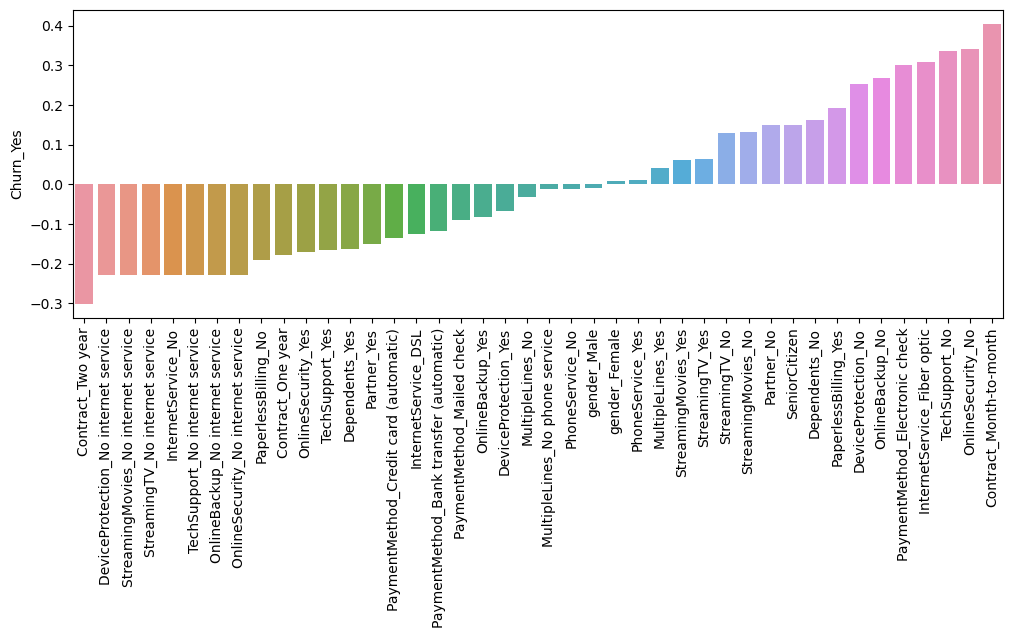

In [48]:
plt.figure(figsize=(12,4))
sns.barplot(x=d.corr()['Churn_Yes'].sort_values().iloc[1:-1].index, y=d.corr()['Churn_Yes'].sort_values().iloc[1:-1])
plt.xticks(rotation=90);

In [49]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='tenure', ylabel='Count'>

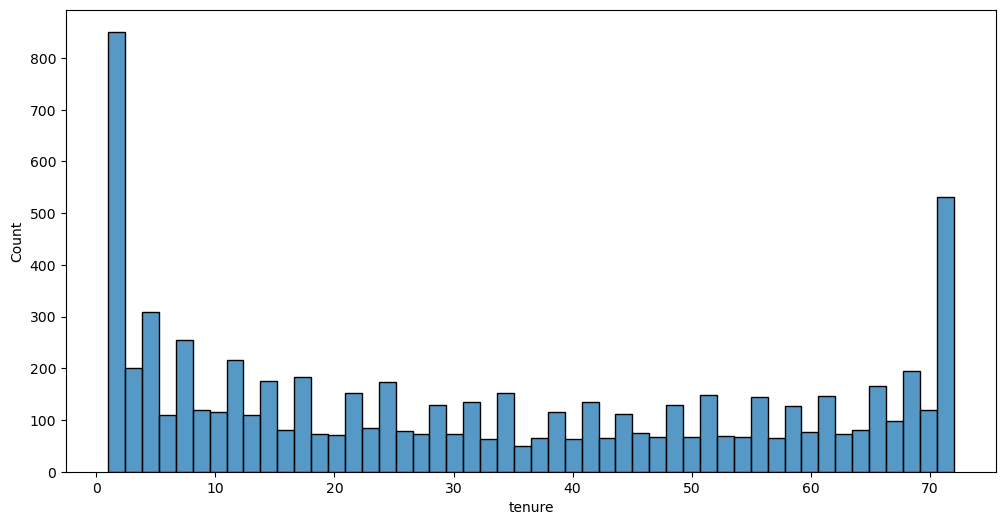

In [54]:
plt.figure(figsize=(12,6))
sns.histplot(x=df['tenure'],bins=50)

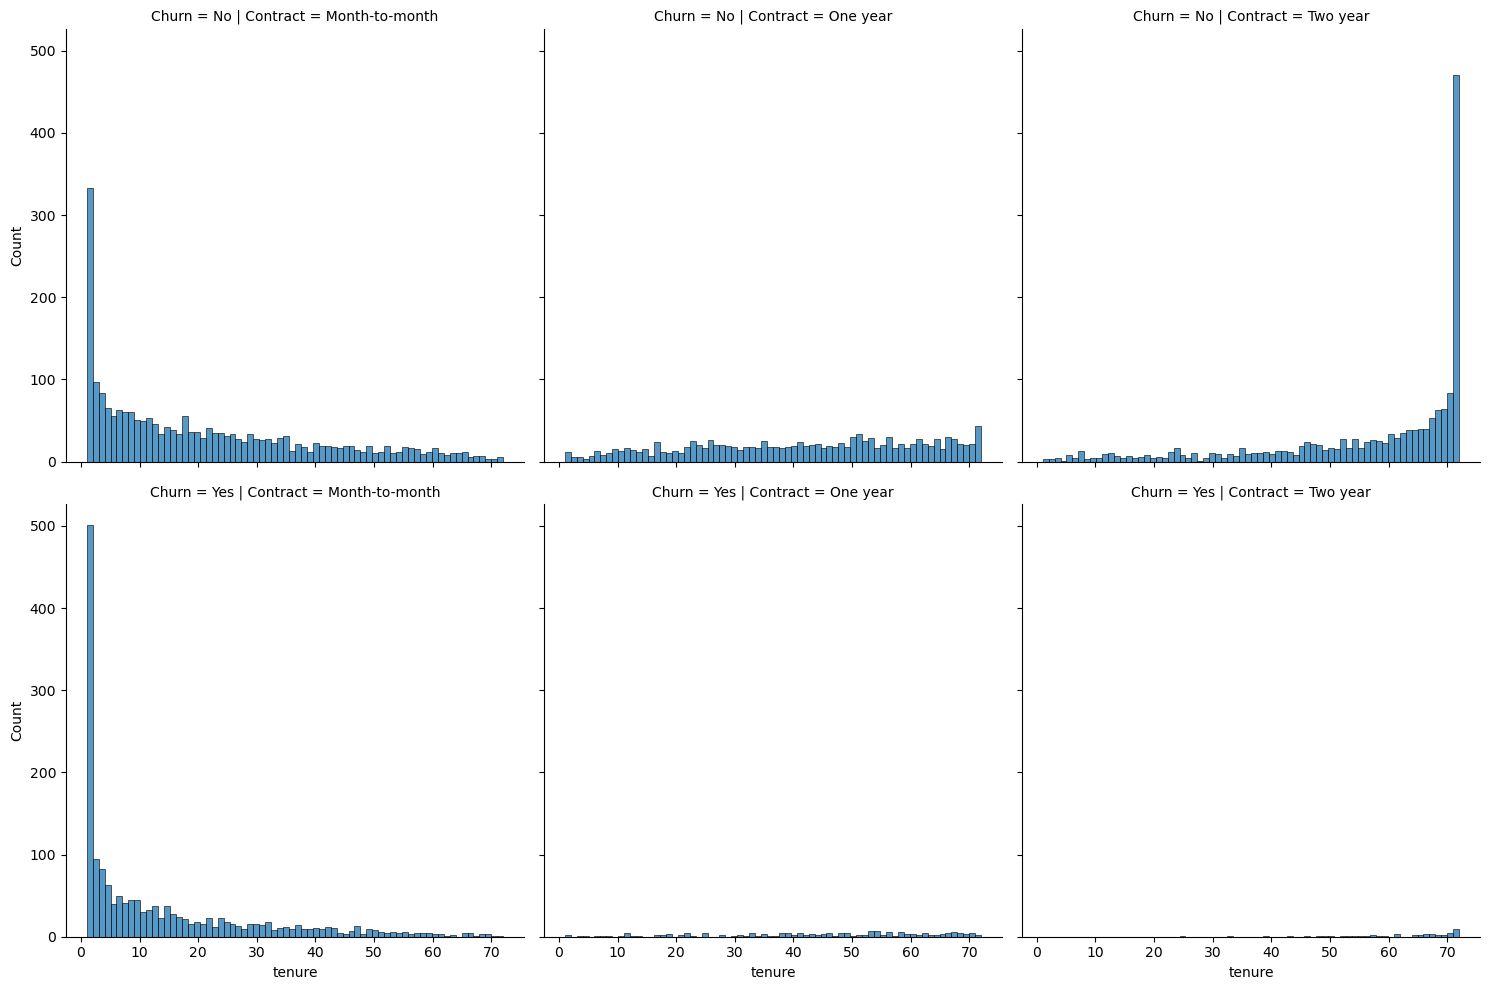

In [57]:
sns.displot(data=df, x='tenure', row='Churn', col='Contract', bins=70)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

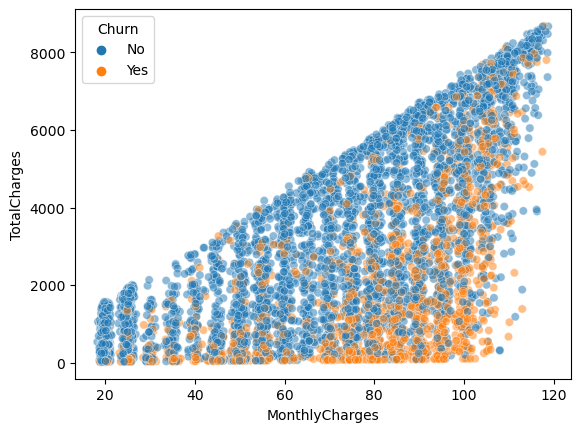

In [61]:
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.5)

In [68]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

In [80]:
n = df.groupby(['Churn', 'tenure']).count().transpose()['No']
y = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

r = 100*y/(y+n)

In [85]:
r.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<AxesSubplot:xlabel='tenure'>

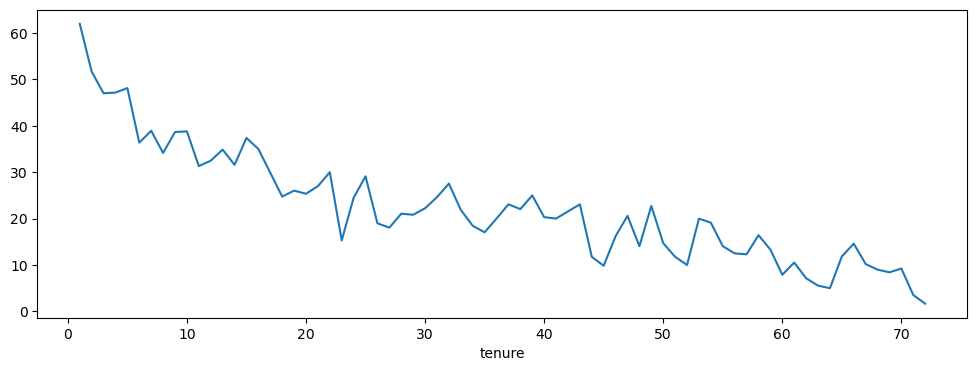

In [87]:
plt.figure(figsize=(12,4))
r.transpose()['customerID'].plot()

In [98]:
for i in range (0,len(df)):
    a = df['tenure'].iloc[i]
    if a<=12:
        df['Tenure Cohort'].iloc[i] = '0-12 Months'
    if a>12 and a<=24:
        df['Tenure Cohort'].iloc[i] = '12-24 Months'
    if a<=48 and a>24:
        df['Tenure Cohort'].iloc[i] = '24-48 Months'
    if a>48:
        df['Tenure Cohort'].iloc[i] = 'Over 48 Months'

/Users/macbookpro/envs/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [102]:
df[['tenure', 'Tenure Cohort']].head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

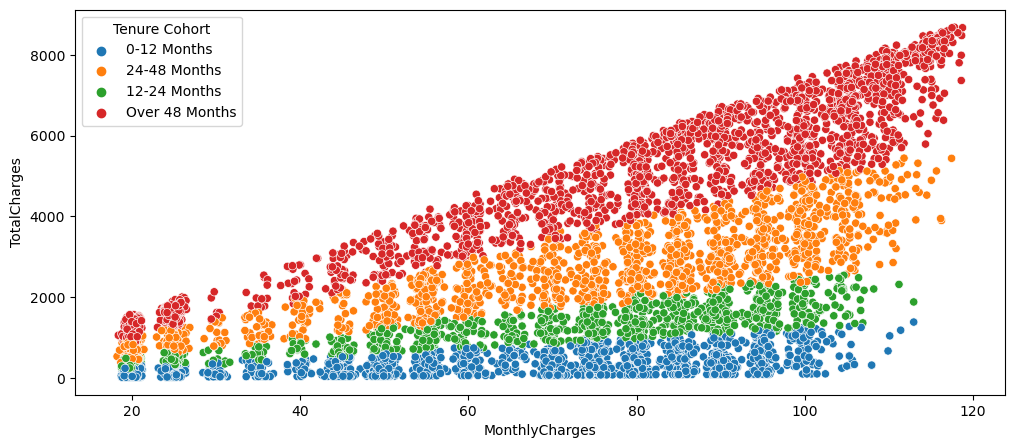

In [106]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, y='TotalCharges', x='MonthlyCharges', hue='Tenure Cohort')

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

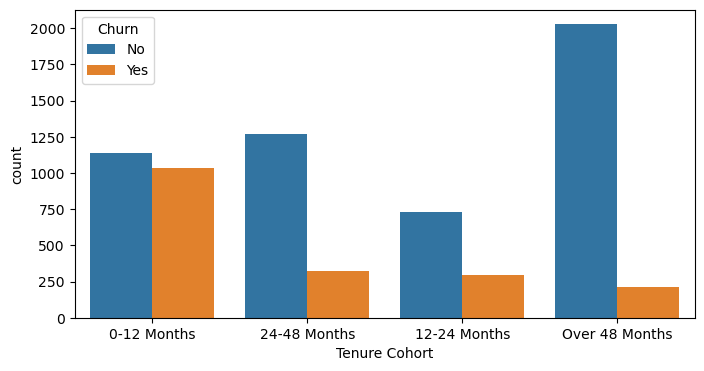

In [112]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

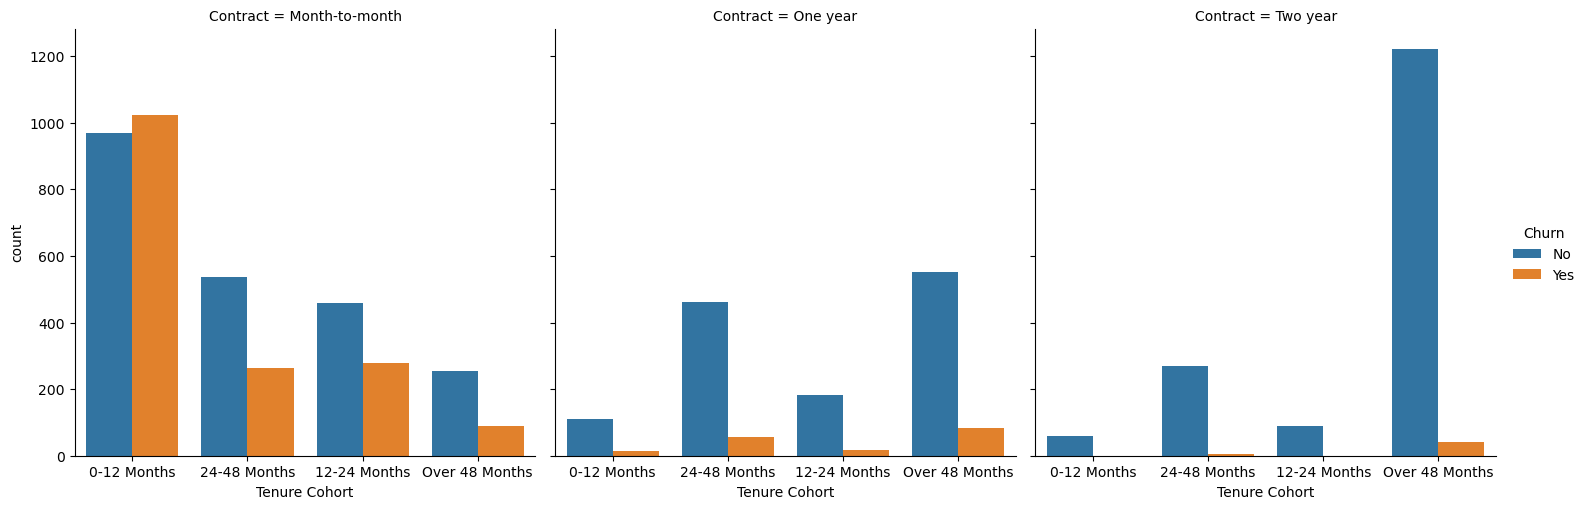

In [115]:
sns.catplot(data=df, x='Tenure Cohort', col='Contract', hue='Churn', kind='count')

In [119]:
X = pd.get_dummies(df.drop(['Churn','customerID'], axis=1), drop_first=True)
y = df['Churn']

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [187]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

In [166]:
params = {'criterion':['gini','entropy'], 'max_depth':[2,4,6,8]}

In [167]:
model = DecisionTreeClassifier()

In [168]:
grid = GridSearchCV(model, params)

In [169]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

In [170]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [171]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

In [172]:
pred = grid.predict(X_test)

In [173]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88       557
         Yes       0.54      0.38      0.45       147

    accuracy                           0.80       704
   macro avg       0.69      0.65      0.66       704
weighted avg       0.78      0.80      0.79       704



In [174]:
print(confusion_matrix(y_test,pred))

[[509  48]
 [ 91  56]]


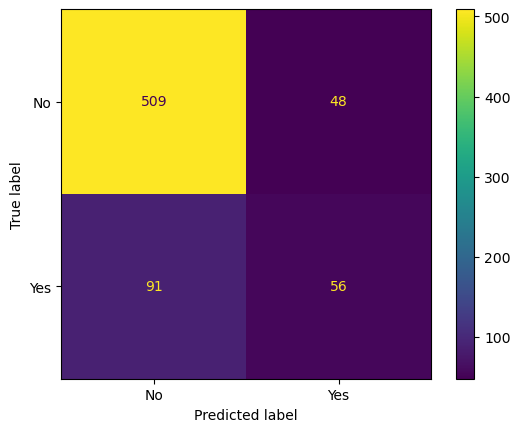

In [188]:
print(plot_confusion_matrix(grid, X_test, y_test))

In [190]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [211]:
dt.fit(X_train, y_train)
dt.feature_importances_

array([0.01425835, 0.13411046, 0.05587793, 0.06252406, 0.00347291,
       0.        , 0.        , 0.        , 0.00928596, 0.        ,
       0.11008067, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0160606 , 0.        , 0.        , 0.        ,
       0.        , 0.00251282, 0.        , 0.02621065, 0.21257279,
       0.32785776, 0.        , 0.        , 0.02517504, 0.        ,
       0.        , 0.        , 0.        ])

In [200]:
imp = pd.DataFrame(data=dt.feature_importances_, index=X.columns, columns=['Feature Importance'])
imp

,Feature Importance
SeniorCitizen,0.014258
tenure,0.134110
MonthlyCharges,0.055878
TotalCharges,0.062524
gender_Male,0.003473
Partner_Yes,0.000000
Dependents_Yes,0.000000
PhoneService_Yes,0.000000
MultipleLines_No phone service,0.009286
MultipleLines_Yes,0.000000


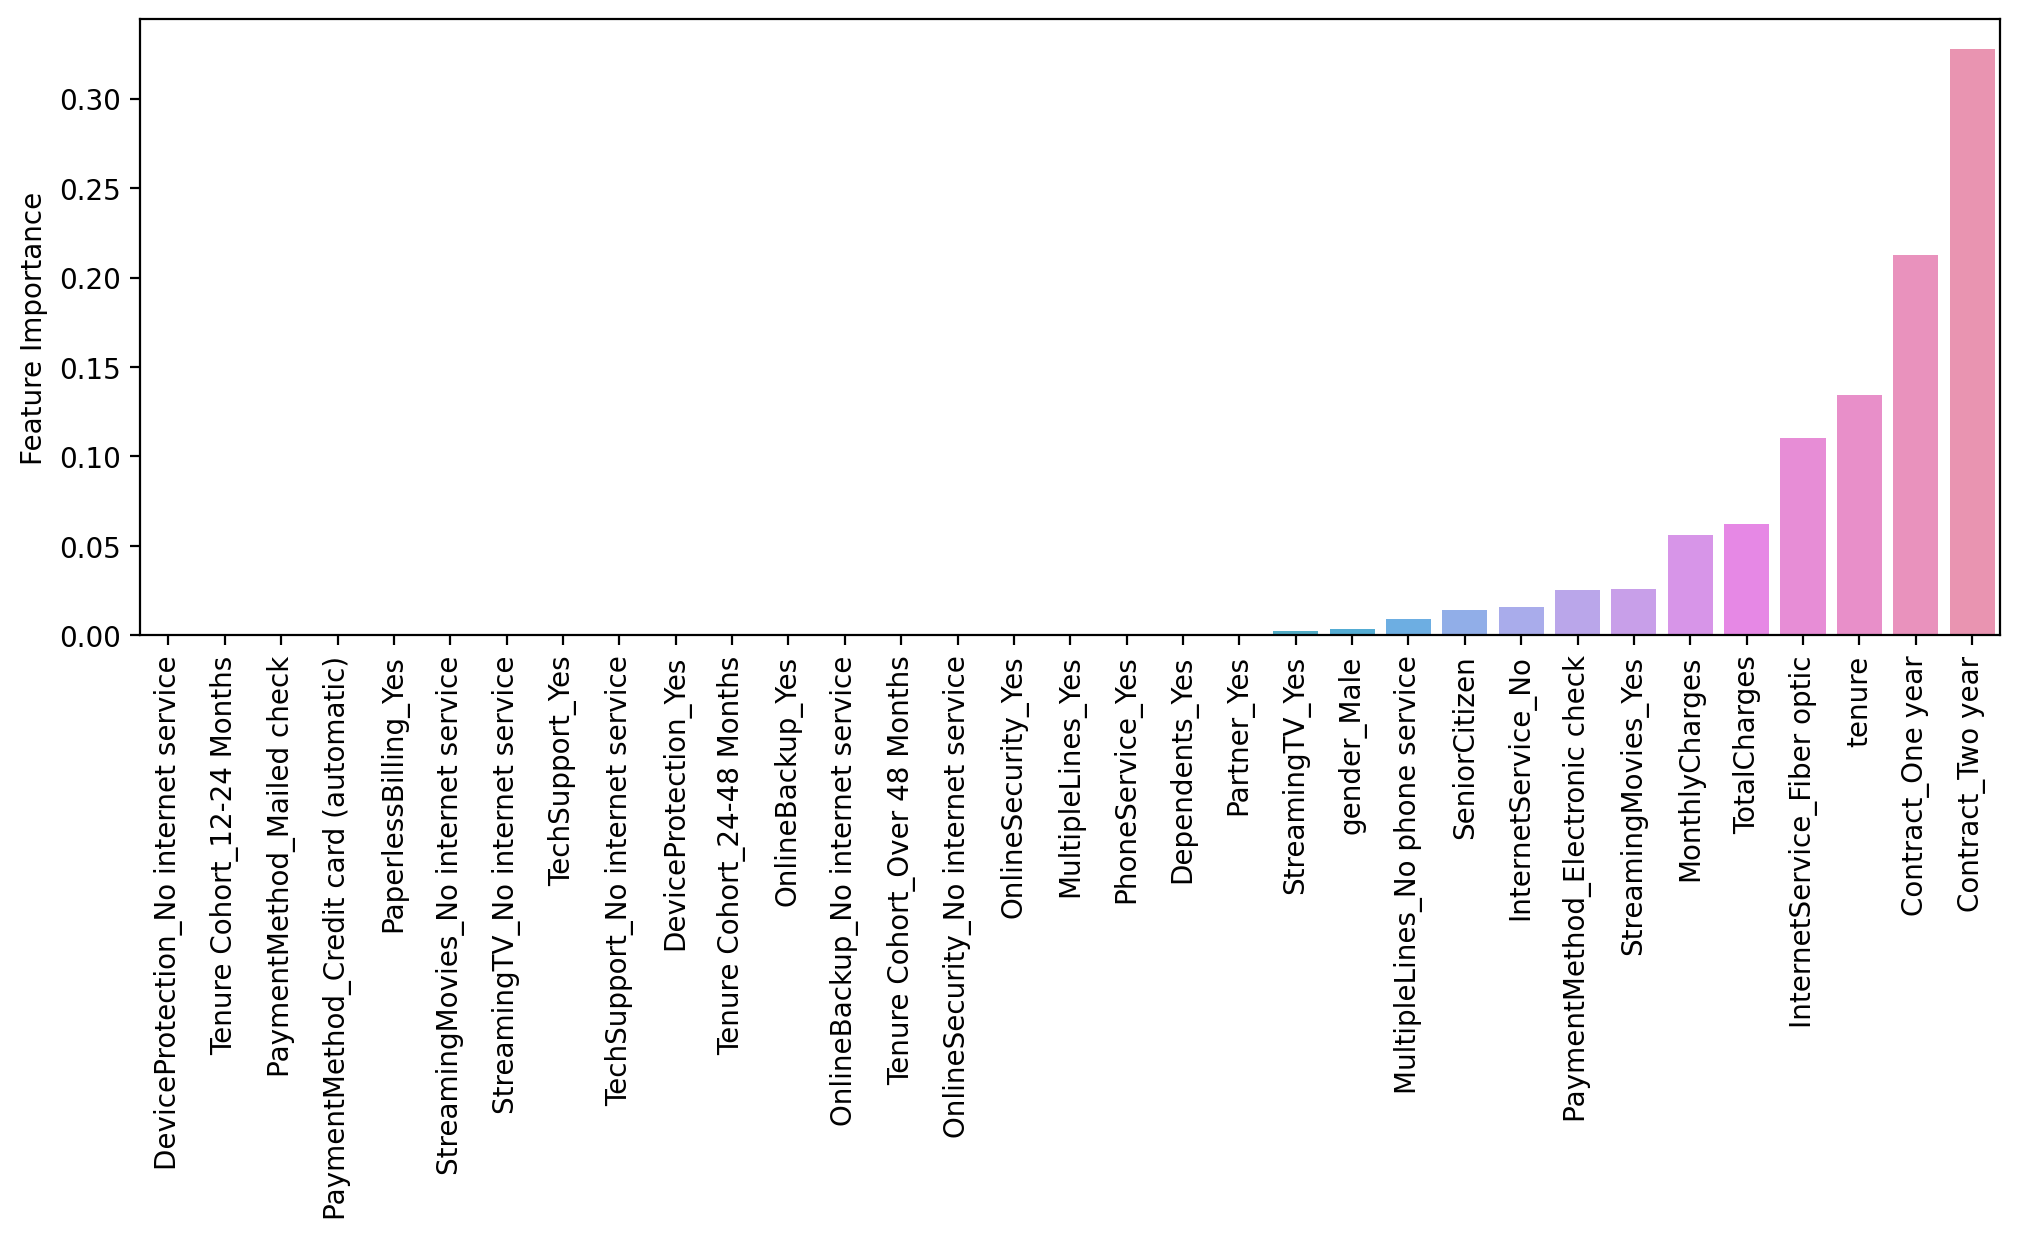

In [209]:
plt.figure(figsize=(12,4), dpi=200)
sns.barplot(data=imp.sort_values('Feature Importance'), x=imp.sort_values('Feature Importance').index, y='Feature Importance')
plt.xticks(rotation=90);

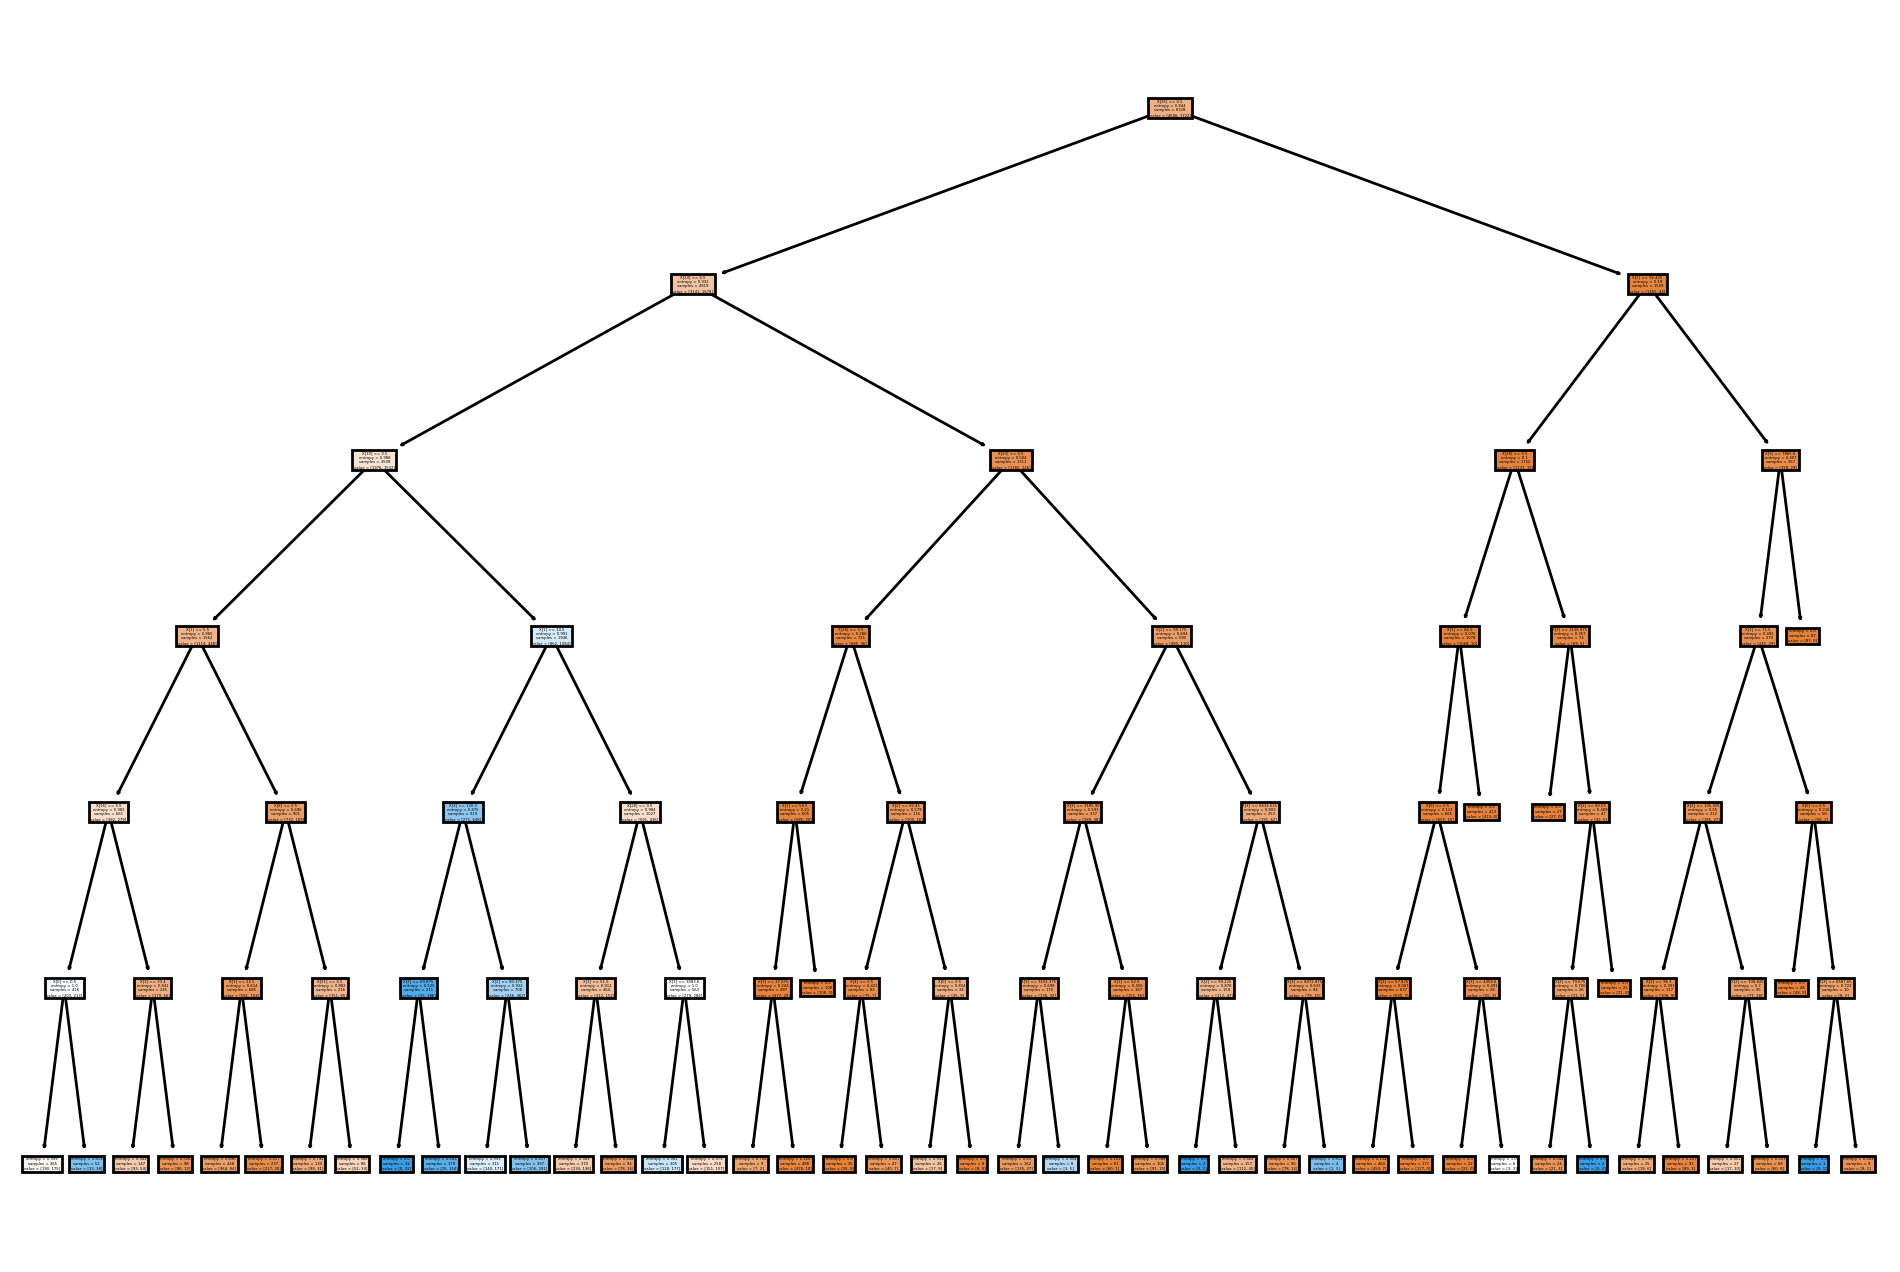

In [212]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(dt, filled=True);

In [216]:
from sklearn.ensemble import RandomForestClassifier

In [218]:
rc = RandomForestClassifier()

In [221]:
rc.fit(X_train, y_train)
yp = rc.predict(X_test)

In [223]:
print(classification_report(yp, y_test))

              precision    recall  f1-score   support

          No       0.89      0.87      0.88       575
         Yes       0.48      0.54      0.51       129

    accuracy                           0.81       704
   macro avg       0.69      0.70      0.69       704
weighted avg       0.82      0.81      0.81       704



<Figure size 100x100 with 0 Axes>

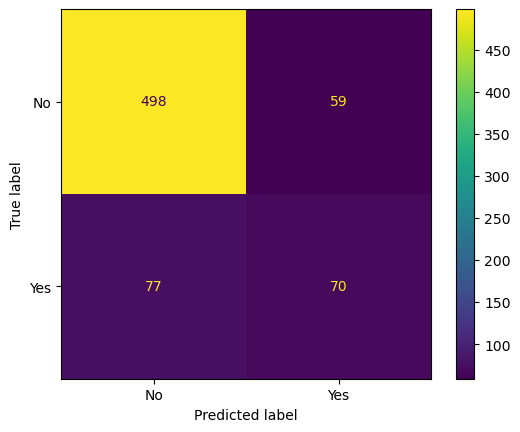

In [231]:
plt.figure(figsize=(1,1))
plot_confusion_matrix(rc, X_test, y_test)
plt.show();

In [233]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [235]:
ac = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

In [236]:
ac.fit(X_train, y_train)
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [238]:
ap = ac.predict(X_test)
gbp = gbc.predict(X_test)

In [240]:
print(classification_report(ap, y_test))
print(plot_confusion_matrix(ac, X_test, y_test))

              precision    recall  f1-score   support

          No       0.90      0.88      0.89       571
         Yes       0.54      0.60      0.57       133

    accuracy                           0.83       704
   macro avg       0.72      0.74      0.73       704
weighted avg       0.84      0.83      0.83       704



              precision    recall  f1-score   support

          No       0.90      0.87      0.89       577
         Yes       0.50      0.57      0.53       127

    accuracy                           0.82       704
   macro avg       0.70      0.72      0.71       704
weighted avg       0.83      0.82      0.82       704



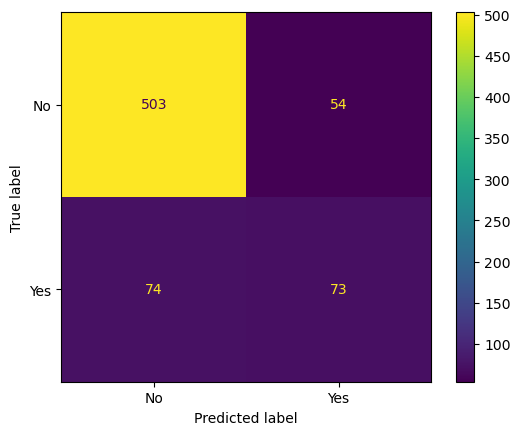

In [244]:
print(classification_report(gbp, y_test))
print(plot_confusion_matrix(gbc, X_test, y_test))

**TASK: Analyze your results, which model performed best for you?**

In [294]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

### Great job!